In [1]:
# tensorflow is a library for fast tensor manipulation
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words means you'll only keep the top 10,000 most frequently occuring words in the training data
# rare words will be discarded
# this allows to work with vector data of manageable size

Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
# Building the network
from keras import models
from keras import layers

model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# Tells the network what optimizer to use
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
x_train.shape

(25000, 10000)

In [13]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['acc'])

# Batch_size is the number of times it runs through the batch and adds it back
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.5078 - acc: 0.7828 - val_loss: 0.3796 - val_acc: 0.8689
Epoch 2/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.3005 - acc: 0.9053 - val_loss: 0.3001 - val_acc: 0.8906
Epoch 3/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.2178 - acc: 0.9282 - val_loss: 0.3079 - val_acc: 0.8721
Epoch 4/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.1750 - acc: 0.9436 - val_loss: 0.2838 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1425 - acc: 0.9541 - val_loss: 0.2847 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1150 - acc: 0.9651 - val_loss: 0.3143 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3126 - 

In [15]:
history_dict = history.history
history_dict.keys()
[u'acc', u'loss', u'val_acc', u'val_loss']

['acc', 'loss', 'val_acc', 'val_loss']

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
# This serves as a marker for the originial parameters

In [18]:
# Overtraining/overfeeding is where it memorizes the pattern that was set for the network
# It memorizes the small patterns and if something falls into its pattern then it
# gets labeled as that thing
# You can add random noise to fix this problem. It creates a more broad outline so it doesn't
# memorize patterns 
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

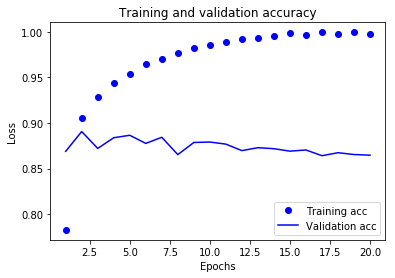

In [19]:
plt.clf() # clears the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.4743 - acc: 0.8206
Epoch 2/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.2638 - acc: 0.9102
Epoch 3/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.1993 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 4s 148us/step


In [21]:
results

[0.3250337515449524, 0.87268]

In [22]:
model.predict(x_test)

array([[0.13237198],
       [0.9997235 ],
       [0.26496774],
       ...,
       [0.0729683 ],
       [0.04766338],
       [0.47623575]], dtype=float32)

In [23]:
# First set of changes in parameters
# Epochs increased to 10

In [24]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/10
25000/25000 [==============================] - 3s 102us/step - loss: 0.4583 - acc: 0.8140
Epoch 2/10
25000/25000 [==============================] - 2s 83us/step - loss: 0.2632 - acc: 0.9093
Epoch 3/10
25000/25000 [==============================] - 2s 85us/step - loss: 0.2008 - acc: 0.9279
Epoch 4/10
25000/25000 [==============================] - 2s 84us/step - loss: 0.1690 - acc: 0.9383
Epoch 5/10
25000/25000 [==============================] - 2s 85us/step - loss: 0.1452 - acc: 0.9486
Epoch 6/10
25000/25000 [==============================] - 2s 94us/step - loss: 0.1291 - acc: 0.9550
Epoch 7/10
25000/25000 [==============================] - 2s 84us/step - loss: 0.1155 - acc: 0.9604
Epoch 8/10
25000/25000 [==============================] - 2s 86us/step - loss: 0.1033 - acc: 0.9637
Epoch 9/10
25000/25000 [==============================] - 2s 86us/step - loss: 0.0938 - acc: 0.9676
Epoch 10/10
25000/25000 [==============================] - 3s 138us/step


In [25]:
results

[0.4383965616607666, 0.86448]

In [26]:
model.predict(x_test)

array([[0.0701666 ],
       [0.9999521 ],
       [0.77896297],
       ...,
       [0.11491497],
       [0.02344751],
       [0.87617725]], dtype=float32)

In [27]:
# Second set of changes in parameters
# Batch size increased to 1000

In [28]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=1000)
results = model.evaluate(x_test, y_test)

Epoch 1/10
25000/25000 [==============================] - 3s 107us/step - loss: 0.5302 - acc: 0.7857
Epoch 2/10
25000/25000 [==============================] - 2s 88us/step - loss: 0.3408 - acc: 0.8926
Epoch 3/10
25000/25000 [==============================] - 2s 88us/step - loss: 0.2568 - acc: 0.9172
Epoch 4/10
25000/25000 [==============================] - 2s 88us/step - loss: 0.2145 - acc: 0.9257
Epoch 5/10
25000/25000 [==============================] - 2s 89us/step - loss: 0.1827 - acc: 0.9375
Epoch 6/10
25000/25000 [==============================] - 2s 88us/step - loss: 0.1604 - acc: 0.9456
Epoch 7/10
25000/25000 [==============================] - 2s 92us/step - loss: 0.1390 - acc: 0.9534
Epoch 8/10
25000/25000 [==============================] - 2s 90us/step - loss: 0.1292 - acc: 0.9565
Epoch 9/10
25000/25000 [==============================] - 3s 103us/step - loss: 0.1157 - acc: 0.9624
Epoch 10/10
25000/25000 [==============================] - 4s 161us/step


In [29]:
results

[0.3438275262594223, 0.87432]

In [30]:
model.predict(x_test)

array([[0.14490157],
       [0.9999621 ],
       [0.6757294 ],
       ...,
       [0.0976494 ],
       [0.03315741],
       [0.69416267]], dtype=float32)

In [31]:
# Third set of changes in parameters
# Batch size back to 512. Epochs equal to 4
# sgd optimizer used instead of rmsprop

In [32]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.6889 - acc: 0.5428
Epoch 2/4
25000/25000 [==============================] - 2s 83us/step - loss: 0.6697 - acc: 0.6297
Epoch 3/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.6406 - acc: 0.7025
Epoch 4/4
25000/25000 [==============================] - 3s 106us/step


In [33]:
results

[0.5922212927246093, 0.76596]

In [34]:
model.predict(x_test)

array([[0.47539118],
       [0.639273  ],
       [0.617217  ],
       ...,
       [0.4086302 ],
       [0.43364215],
       [0.55690205]], dtype=float32)

In [35]:
# Third set of changes in parameters
# Batch size back to 512. Epochs equal to 4
# sgd optimizer used 
# mean_squared_error loss function used instead of binary_crossentropy

In [36]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'sgd',
             loss = 'mean_squared_error',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.2482 - acc: 0.5300
Epoch 2/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.2427 - acc: 0.5871
Epoch 3/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2355 - acc: 0.6392
Epoch 4/4
25000/25000 [==============================] - 3s 106us/step


In [37]:
results

[0.22265447635650634, 0.70572]

In [38]:
model.predict(x_test)

array([[0.5118873 ],
       [0.5786984 ],
       [0.5430622 ],
       ...,
       [0.4837125 ],
       [0.53345436],
       [0.5171001 ]], dtype=float32)

In [39]:
# Fourth set of changes uses the originial parameters 
# except uses the mse loss function instead o binary_crossentropy

In [40]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.1444 - acc: 0.8210
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.0772 - acc: 0.9099
Epoch 3/4
25000/25000 [==============================] - 2s 78us/step - loss: 0.0590 - acc: 0.9302
Epoch 4/4
25000/25000 [==============================] - 3s 108us/step


In [41]:
results

[0.08540993715763091, 0.884]

In [42]:
model.predict(x_test)

array([[0.19549894],
       [0.99909866],
       [0.8717751 ],
       ...,
       [0.1537549 ],
       [0.10430457],
       [0.6245485 ]], dtype=float32)

In [43]:
# Fifth set of changes uses the originial parameters 
# except uses the mse loss function instead of binary_crossentropy
# and uses the tanh activation instead of relu

In [44]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.1388 - acc: 0.8321
Epoch 2/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.0693 - acc: 0.9152
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.0516 - acc: 0.9356
Epoch 4/4
25000/25000 [==============================] - 2s 69us/step


In [45]:
results

[0.09533955956816673, 0.87528]

In [46]:
model.predict(x_test)

array([[0.0640539 ],
       [0.9981811 ],
       [0.9915187 ],
       ...,
       [0.19993085],
       [0.07901686],
       [0.8018413 ]], dtype=float32)

In [47]:
# Sixth set of changes uses the originial parameters 
# and uses the tanh activation instead of relu

In [48]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.4182 - acc: 0.8305
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2310 - acc: 0.9154
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.1762 - acc: 0.9348
Epoch 4/4
25000/25000 [==============================] - 2s 65us/step


In [49]:
results

[0.32564479331970214, 0.87672]

In [50]:
model.predict(x_test)

array([[0.07824724],
       [0.9980604 ],
       [0.80349743],
       ...,
       [0.07016245],
       [0.05840616],
       [0.8314956 ]], dtype=float32)

In [51]:
# Seventh set of changes uses the originial parameters 
# and uses the tanh activation instead of relu because that seems to produce better
# accuracy. I also have increased the epochs to 10 and lowered the batch size to 412

In [52]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=412)
results = model.evaluate(x_test, y_test)

Epoch 1/10
25000/25000 [==============================] - 2s 73us/step - loss: 0.4282 - acc: 0.8371
Epoch 2/10
25000/25000 [==============================] - 1s 57us/step - loss: 0.2337 - acc: 0.9170
Epoch 3/10
25000/25000 [==============================] - 1s 51us/step - loss: 0.1759 - acc: 0.9366
Epoch 4/10
25000/25000 [==============================] - 1s 51us/step - loss: 0.1457 - acc: 0.9475
Epoch 5/10
25000/25000 [==============================] - 1s 52us/step - loss: 0.1262 - acc: 0.9578
Epoch 6/10
25000/25000 [==============================] - 1s 51us/step - loss: 0.1101 - acc: 0.9642
Epoch 7/10
25000/25000 [==============================] - 1s 51us/step - loss: 0.0961 - acc: 0.9700
Epoch 8/10
25000/25000 [==============================] - 1s 52us/step - loss: 0.0900 - acc: 0.9724
Epoch 9/10
25000/25000 [==============================] - 1s 51us/step - loss: 0.0780 - acc: 0.9765
Epoch 10/10
25000/25000 [==============================] - 2s 65us/step


In [53]:
results

[0.514736520318985, 0.85712]

In [54]:
model.predict(x_test)

array([[0.03776944],
       [0.9987826 ],
       [0.95804495],
       ...,
       [0.10167404],
       [0.01266373],
       [0.9907823 ]], dtype=float32)

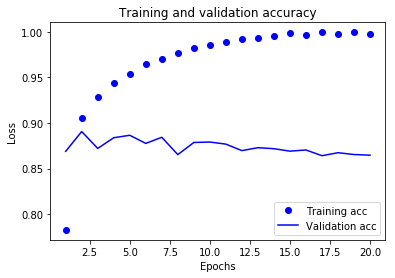

In [55]:
plt.clf() # clears the figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [56]:
# Eighth set of changes uses the originial parameters 
# and uses the tanh activation instead of relu because that seems to produce better
# accuracy. I also have increased the epochs to 6 and lowered the batch size to 512

In [57]:
model.predict(x_test)

array([[0.03776944],
       [0.9987826 ],
       [0.95804495],
       ...,
       [0.10167404],
       [0.01266373],
       [0.9907823 ]], dtype=float32)

In [58]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/6
25000/25000 [==============================] - 2s 96us/step - loss: 0.4438 - acc: 0.8296
Epoch 2/6
25000/25000 [==============================] - 2s 73us/step - loss: 0.2480 - acc: 0.9123
Epoch 3/6
25000/25000 [==============================] - 2s 73us/step - loss: 0.1854 - acc: 0.9327
Epoch 4/6
25000/25000 [==============================] - 2s 74us/step - loss: 0.1512 - acc: 0.9466
Epoch 5/6
25000/25000 [==============================] - 2s 73us/step - loss: 0.1307 - acc: 0.9550
Epoch 6/6
25000/25000 [==============================] - 2s 67us/step


In [59]:
results

[0.40587328494548797, 0.86176]

In [60]:
# Eighth set of changes uses the originial parameters 
# and uses the tanh activation instead of relu because that seems to produce better
# accuracy. I also have increased the hidden units used by the layers to 32

In [61]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 108us/step - loss: 0.4025 - acc: 0.8286
Epoch 2/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.2253 - acc: 0.9118
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.1759 - acc: 0.9338
Epoch 4/4
25000/25000 [==============================] - 2s 72us/step


In [62]:
results

[0.3332366373825073, 0.87564]

In [63]:
model.predict(x_test)

array([[0.12746376],
       [0.99945706],
       [0.8962241 ],
       ...,
       [0.10556126],
       [0.04144866],
       [0.68813205]], dtype=float32)

In [64]:
# Nineth set of changes uses the originial parameters 
# and uses the mse loss function instead of binary_crossentropy
# I also have increased the hidden units used by the layers to 32
# Am trying to beat [0.08531691110730172, 0.88416] for results

In [65]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.1358 - acc: 0.8285
Epoch 2/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.0714 - acc: 0.9128
Epoch 3/4
25000/25000 [==============================] - 3s 109us/step - loss: 0.0555 - acc: 0.9321
Epoch 4/4
25000/25000 [==============================] - 4s 144us/step


In [66]:
results

[0.09663559941887856, 0.86932]

In [67]:
model.predict(x_test)

array([[0.0910129 ],
       [0.99811816],
       [0.63224906],
       ...,
       [0.08758566],
       [0.03835934],
       [0.3732337 ]], dtype=float32)

In [68]:
# Tenth set of changes uses the originial parameters 
# and uses the mse loss function instead of binary_crossentropy
# I also have increased the hidden units used by the layers to 64
# Am trying to beat [0.08531691110730172, 0.88416] for results

In [69]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 135us/step - loss: 0.1381 - acc: 0.8048
Epoch 2/4
25000/25000 [==============================] - 3s 119us/step - loss: 0.0696 - acc: 0.9106
Epoch 3/4
25000/25000 [==============================] - 3s 115us/step - loss: 0.0552 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 4s 153us/step


In [70]:
results

[0.09615927561461926, 0.87248]

In [71]:
model.predict(x_test)

array([[0.15405141],
       [0.9999713 ],
       [0.99364954],
       ...,
       [0.31035933],
       [0.09684984],
       [0.7881257 ]], dtype=float32)

In [72]:
# Tenth set of changes uses the originial parameters 
# and uses the mse loss function instead of binary_crossentropy
# I also have decreasesd the batch size to 412
# Am trying to beat [0.08531691110730172, 0.88416] for results

In [73]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=412)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.1412 - acc: 0.8316
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.0738 - acc: 0.9157
Epoch 3/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.0561 - acc: 0.9328
Epoch 4/4
25000/25000 [==============================] - 3s 138us/step


In [74]:
results

[0.08884503876566886, 0.88]

In [75]:
model.predict(x_test)

array([[0.11540182],
       [0.99738544],
       [0.796005  ],
       ...,
       [0.19288963],
       [0.06724109],
       [0.6405865 ]], dtype=float32)

In [76]:
# 11th changed loss to mse and epochs to 3
# Am trying to beat [0.08531691110730172, 0.88416] for results

In [77]:
model = models.Sequential() # Sequential is important
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=412)
results = model.evaluate(x_test, y_test)

Epoch 1/3
25000/25000 [==============================] - 2s 90us/step - loss: 0.1478 - acc: 0.8264
Epoch 2/3
25000/25000 [==============================] - 2s 70us/step - loss: 0.0750 - acc: 0.9113
Epoch 3/3
25000/25000 [==============================] - 3s 140us/step


In [78]:
results

[0.08466435901403427, 0.88536]

In [79]:
model.predict(x_test)

array([[0.16865538],
       [0.9974534 ],
       [0.73188347],
       ...,
       [0.14024647],
       [0.13007125],
       [0.55914146]], dtype=float32)